#                  E-Signing of Loan Based on Financial History

Electronic signatures aren’t exactly a novelty. They have been around since the American Civil War, during which contracts were signed through Morse. In a modern setting, an e-Sign refers to a unique, digitised, encrypted personal identifier. This is, in essence, different from the ‘wet’ signatures created by hand. The e-Sign is meant to complete transactions, loops, and agreements electronically.

In India, the e-Sign has been granted legal status by amendments to various laws, namely the Information Technology Act, Indian Evidence Act and the Negotiable Instruments Act. Early adopters in the financial sector have started using e-Sign to get customers to sign loan and card applications, and loan agreements.

### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [111]:
data = pd.read_csv('financial_data.csv')

## EDA

In [98]:
data.head()

,entry_id,age,pay_schedule,home_owner,income,months_employed,years_employed,current_address_year,personal_account_m,personal_account_y,...,amount_requested,risk_score,risk_score_2,risk_score_3,risk_score_4,risk_score_5,ext_quality_score,ext_quality_score_2,inquiries_last_month,e_signed
0,7629673,40,bi-weekly,1,3135,0,3,3,6,2,...,550,36200,0.737398,0.903517,0.487712,0.515977,0.580918,0.380918,10,1
1,3560428,61,weekly,0,3180,0,6,3,2,7,...,600,30150,0.738510,0.881027,0.713423,0.826402,0.730720,0.630720,9,0
2,6934997,23,weekly,0,1540,6,0,0,7,1,...,450,34550,0.642993,0.766554,0.595018,0.762284,0.531712,0.531712,7,0
3,5682812,40,bi-weekly,0,5230,0,6,1,2,7,...,700,42150,0.665224,0.960832,0.767828,0.778831,0.792552,0.592552,8,1
4,5335819,33,semi-monthly,0,3590,0,5,2,2,8,...,1100,53850,0.617361,0.857560,0.613487,0.665523,0.744634,0.744634,12,0


In [7]:
data.describe()

,entry_id,age,home_owner,income,months_employed,years_employed,current_address_year,personal_account_m,personal_account_y,has_debt,amount_requested,risk_score,risk_score_2,risk_score_3,risk_score_4,risk_score_5,ext_quality_score,ext_quality_score_2,inquiries_last_month,e_signed
count,1.790800e+04,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000
mean,5.596978e+06,43.015412,0.425173,3657.214653,1.186006,3.526860,3.584711,3.427183,3.503350,0.795399,950.446449,61086.302211,0.690878,0.878276,0.583155,0.718252,0.623112,0.622068,6.457226,0.538251
std,2.562473e+06,11.873107,0.494383,1504.890063,2.400897,2.259732,2.751937,2.216440,1.955568,0.403421,698.543683,15394.255020,0.090470,0.054563,0.125061,0.120697,0.139729,0.139898,3.673093,0.498549
min,1.111398e+06,18.000000,0.000000,905.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,350.000000,2100.000000,0.023258,0.451371,0.016724,0.153367,0.010184,0.006622,1.000000,0.000000
25%,3.378999e+06,34.000000,0.000000,2580.000000,0.000000,2.000000,2.000000,2.000000,2.000000,1.000000,600.000000,49350.000000,0.640993,0.850882,0.500208,0.633708,0.521735,0.519677,4.000000,0.000000
50%,5.608376e+06,42.000000,0.000000,3260.000000,0.000000,3.000000,3.000000,2.000000,3.000000,1.000000,700.000000,61200.000000,0.699561,0.881004,0.588208,0.725113,0.625944,0.622974,6.000000,1.000000
75%,7.805624e+06,51.000000,1.000000,4670.000000,1.000000,5.000000,5.000000,5.000000,4.000000,1.000000,1100.000000,72750.000000,0.752887,0.912608,0.672395,0.806681,0.729841,0.728940,8.000000,1.000000
max,9.999874e+06,96.000000,1.000000,9985.000000,11.000000,16.000000,12.000000,11.000000,15.000000,1.000000,10200.000000,99750.000000,0.999997,0.999024,0.978932,0.996260,0.970249,0.966953,30.000000,1.000000


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17908 entries, 0 to 17907
Data columns (total 21 columns):
entry_id                17908 non-null int64
age                     17908 non-null int64
pay_schedule            17908 non-null object
home_owner              17908 non-null int64
income                  17908 non-null int64
months_employed         17908 non-null int64
years_employed          17908 non-null int64
current_address_year    17908 non-null int64
personal_account_m      17908 non-null int64
personal_account_y      17908 non-null int64
has_debt                17908 non-null int64
amount_requested        17908 non-null int64
risk_score              17908 non-null int64
risk_score_2            17908 non-null float64
risk_score_3            17908 non-null float64
risk_score_4            17908 non-null float64
risk_score_5            17908 non-null float64
ext_quality_score       17908 non-null float64
ext_quality_score_2     17908 non-null float64
inquiries_last_month   

In [11]:
data['pay_schedule'].value_counts()

bi-weekly       10716
weekly           3696
semi-monthly     2004
monthly          1492
Name: pay_schedule, dtype: int64

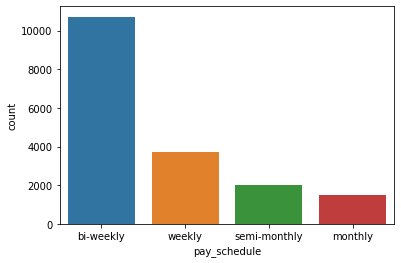

In [18]:
sns.countplot(x='pay_schedule', data = data)

#Pay Schedule of most of the clients is on bi-weekly basis

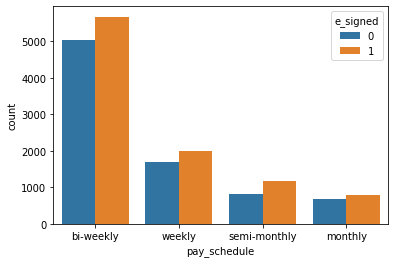

In [16]:
sns.countplot(x='pay_schedule', hue='e_signed', data=data)

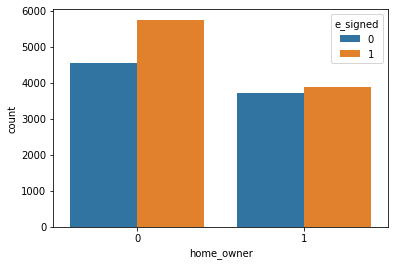

In [19]:
sns.countplot(x='home_owner', hue='e_signed', data=data)

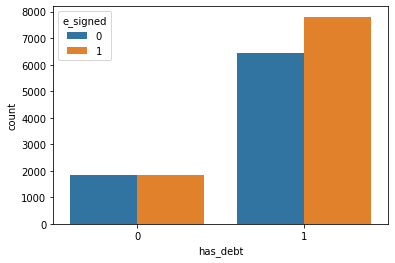

In [20]:
sns.countplot(x='has_debt', hue='e_signed', data=data)

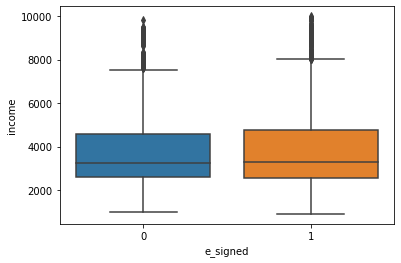

In [21]:
sns.boxplot(x='e_signed', y='income', data=data)

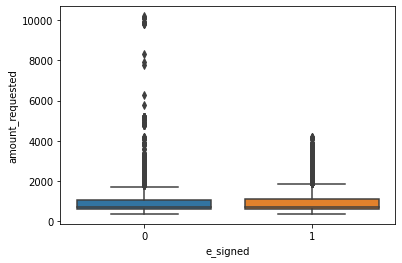

In [24]:
sns.boxplot(x='e_signed', y='amount_requested', data=data)

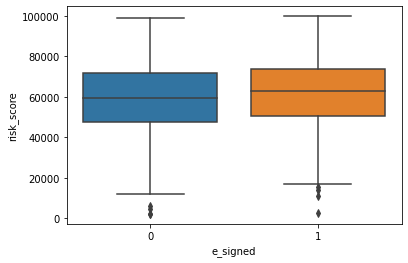

In [25]:
sns.boxplot(x='e_signed', y='risk_score', data=data)

In [112]:
data.isnull().sum()

entry_id                0
age                     0
pay_schedule            0
home_owner              0
income                  0
months_employed         0
years_employed          0
current_address_year    0
personal_account_m      0
personal_account_y      0
has_debt                0
amount_requested        0
risk_score              0
risk_score_2            0
risk_score_3            0
risk_score_4            0
risk_score_5            0
ext_quality_score       0
ext_quality_score_2     0
inquiries_last_month    0
e_signed                0
dtype: int64

In [114]:
data.head()

,entry_id,age,pay_schedule,home_owner,income,current_address_year,personal_account_m,personal_account_y,has_debt,amount_requested,risk_score,risk_score_2,risk_score_3,risk_score_4,risk_score_5,ext_quality_score,ext_quality_score_2,inquiries_last_month,e_signed,time_employed
0,7629673,40,bi-weekly,1,3135,3,6,2,1,550,36200,0.737398,0.903517,0.487712,0.515977,0.580918,0.380918,10,1,36
1,3560428,61,weekly,0,3180,3,2,7,1,600,30150,0.738510,0.881027,0.713423,0.826402,0.730720,0.630720,9,0,72
2,6934997,23,weekly,0,1540,0,7,1,1,450,34550,0.642993,0.766554,0.595018,0.762284,0.531712,0.531712,7,0,6
3,5682812,40,bi-weekly,0,5230,1,2,7,1,700,42150,0.665224,0.960832,0.767828,0.778831,0.792552,0.592552,8,1,72
4,5335819,33,semi-monthly,0,3590,2,2,8,1,1100,53850,0.617361,0.857560,0.613487,0.665523,0.744634,0.744634,12,0,60


In [115]:
data.shape

(17908, 20)

In [25]:
Y = data["e_signed"]
X = data.drop(columns = ["e_signed"])

In [26]:
print(X.shape)
print(Y.shape)

(17908, 20)
(17908,)


In [28]:
# Splitting into Train and Test Set
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,
                                                    Y,
                                                    test_size = 0.2,
                                                    random_state = 0)

In [30]:
#Scaling our data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

## Model Building

In [40]:
#ANN Model
from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization

model = Sequential()

model.add(Dense(10, activation='relu', input_dim=20))
model.add(Dense(10, activation='relu'))
model.add(Dense(1, activation='sigmoid'))          ##Output Layer

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [41]:
model_classifier = model.fit(X_train,Y_train, batch_size=10, epochs=100)

Epoch 1/100
14326/14326 [==============================] - 2s 109us/step - loss: 0.6946 - accuracy: 0.5381
Epoch 2/100
14326/14326 [==============================] - 1s 82us/step - loss: 0.6729 - accuracy: 0.5794
Epoch 3/100
14326/14326 [==============================] - 1s 83us/step - loss: 0.6656 - accuracy: 0.5886
Epoch 4/100
14326/14326 [==============================] - 1s 84us/step - loss: 0.6598 - accuracy: 0.5964
Epoch 5/100
14326/14326 [==============================] - 1s 84us/step - loss: 0.6548 - accuracy: 0.6072
Epoch 6/100
14326/14326 [==============================] - 1s 85us/step - loss: 0.6514 - accuracy: 0.6078 0s - loss: 0.6526 - accuracy
Epoch 7/100
14326/14326 [==============================] - 1s 82us/step - loss: 0.6484 - accuracy: 0.6091 0s - loss: 0.6476 - accuracy: 
Epoch 8/100
14326/14326 [==============================] - 1s 81us/step - loss: 0.6457 - accuracy: 0.6134
Epoch 9/100
14326/14326 [==============================] - 1s 81us/step - loss: 0.6445 - ac

In [43]:
pred = model.predict(X_test)
y_pred = (pred>0.5)

In [46]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pred,Y_test)

0.6046901172529313

Feature Engineering is not that imp with ANN, as the algorithm itself takes care of the most parts of it.
But to check other algorithms, we need to apply feature engineering on our data.

## Feature Engineering

In [113]:
#Calculating total months of employment of each person and dropping original column
data['time_employed'] = (data['years_employed']*12) + data['months_employed']
data.drop(['months_employed','years_employed'], axis=1, inplace=True)

In [116]:
pay_schedule_dummies = pd.get_dummies(data['pay_schedule'], drop_first=True)
data = pd.concat([data,pay_schedule_dummies], axis=1)
data.drop(['entry_id', 'pay_schedule'], axis=1, inplace=True)
data.head()

,age,home_owner,income,current_address_year,personal_account_m,personal_account_y,has_debt,amount_requested,risk_score,risk_score_2,...,risk_score_4,risk_score_5,ext_quality_score,ext_quality_score_2,inquiries_last_month,e_signed,time_employed,monthly,semi-monthly,weekly
0,40,1,3135,3,6,2,1,550,36200,0.737398,...,0.487712,0.515977,0.580918,0.380918,10,1,36,0,0,0
1,61,0,3180,3,2,7,1,600,30150,0.738510,...,0.713423,0.826402,0.730720,0.630720,9,0,72,0,0,1
2,23,0,1540,0,7,1,1,450,34550,0.642993,...,0.595018,0.762284,0.531712,0.531712,7,0,6,0,0,1
3,40,0,5230,1,2,7,1,700,42150,0.665224,...,0.767828,0.778831,0.792552,0.592552,8,1,72,0,0,0
4,33,0,3590,2,2,8,1,1100,53850,0.617361,...,0.613487,0.665523,0.744634,0.744634,12,0,60,0,1,0


In [117]:
data.head()

,age,home_owner,income,current_address_year,personal_account_m,personal_account_y,has_debt,amount_requested,risk_score,risk_score_2,...,risk_score_4,risk_score_5,ext_quality_score,ext_quality_score_2,inquiries_last_month,e_signed,time_employed,monthly,semi-monthly,weekly
0,40,1,3135,3,6,2,1,550,36200,0.737398,...,0.487712,0.515977,0.580918,0.380918,10,1,36,0,0,0
1,61,0,3180,3,2,7,1,600,30150,0.738510,...,0.713423,0.826402,0.730720,0.630720,9,0,72,0,0,1
2,23,0,1540,0,7,1,1,450,34550,0.642993,...,0.595018,0.762284,0.531712,0.531712,7,0,6,0,0,1
3,40,0,5230,1,2,7,1,700,42150,0.665224,...,0.767828,0.778831,0.792552,0.592552,8,1,72,0,0,0
4,33,0,3590,2,2,8,1,1100,53850,0.617361,...,0.613487,0.665523,0.744634,0.744634,12,0,60,0,1,0


In [118]:
#Segregating Ages into different groups
AGE=[]

for i in range(len(data)):
    if(data['age'][i]<=45):
        AGE.append('ADULT')
        
    else:
        AGE.append('SENIOR')

In [125]:
#Converting list into DataFrame
AGE = pd.DataFrame(AGE)
data = pd.concat([data,AGE],axis=1)

In [119]:
#Inserting total months of account of each person
data['time_account'] = (data['personal_account_y']*12) + data['personal_account_m']
data.drop(['personal_account_m', 'personal_account_y'], axis=1, inplace=True)

In [120]:
#Inserting average of risk_score
data['avg_risk_scores'] = (data['risk_score_2'] + data['risk_score_3'] + data['risk_score_4'] + data['risk_score_5'])/4
data.drop(['risk_score_2', 'risk_score_3', 'risk_score_4', 'risk_score_5'], axis=1, inplace=True)

In [121]:
#Inserting average of ext_quality_score
data['avg_ext_quality_score'] = (data['ext_quality_score'] + data['ext_quality_score_2']) / 2
data.drop(['ext_quality_score', 'ext_quality_score_2'], axis=1, inplace=True)                                 

In [132]:
data.columns = ['Age','Home Owner','Income', 'Current Address Year', 'Has Debt','Requested Amount','Risk Score', 'Last Inquiries','E_Signed','Time Employed', 'Pay Monthly','Pay Semi-monthly','Pay Weekly','Time of Account','Avg Risk Scores','Avg Ext Quality Score','Seniority']

In [134]:
data.drop(['Age'], axis=1, inplace=True)

In [135]:
data.head()

,Home Owner,Income,Current Address Year,Has Debt,Requested Amount,Risk Score,Last Inquiries,E_Signed,Time Employed,Pay Monthly,Pay Semi-monthly,Pay Weekly,Time of Account,Avg Risk Scores,Avg Ext Quality Score,Seniority
0,1,3135,3,1,550,36200,10,1,36,0,0,0,30,0.661151,0.480918,ADULT
1,0,3180,3,1,600,30150,9,0,72,0,0,1,86,0.789841,0.680720,SENIOR
2,0,1540,0,1,450,34550,7,0,6,0,0,1,19,0.691712,0.531712,ADULT
3,0,5230,1,1,700,42150,8,1,72,0,0,0,86,0.793179,0.692552,ADULT
4,0,3590,2,1,1100,53850,12,0,60,0,1,0,98,0.688483,0.744634,ADULT


In [ ]:
#One-Hot encoding 'Seniority' variable
seniority_dummies = pd.get_dummies(data['Seniority'])
data = pd.concat([data,seniority_dummies], axis=1)
data.drop(['Seniority'], axis=1, inplace=True)

In [138]:
data.head()

,Home Owner,Income,Current Address Year,Has Debt,Requested Amount,Risk Score,Last Inquiries,E_Signed,Time Employed,Pay Monthly,Pay Semi-monthly,Pay Weekly,Time of Account,Avg Risk Scores,Avg Ext Quality Score,ADULT,SENIOR
0,1,3135,3,1,550,36200,10,1,36,0,0,0,30,0.661151,0.480918,1,0
1,0,3180,3,1,600,30150,9,0,72,0,0,1,86,0.789841,0.680720,0,1
2,0,1540,0,1,450,34550,7,0,6,0,0,1,19,0.691712,0.531712,1,0
3,0,5230,1,1,700,42150,8,1,72,0,0,0,86,0.793179,0.692552,1,0
4,0,3590,2,1,1100,53850,12,0,60,0,1,0,98,0.688483,0.744634,1,0


In [139]:
y = data["E_Signed"]
x = data.drop(columns = ["E_Signed"])

In [142]:
#Transforming/Scaling the data
scale = StandardScaler()
x = scale.fit_transform(x)

In [143]:
# Splitting into Train and Test Set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,
                                                    y,
                                                    test_size = 0.2,
                                                    random_state = 0)

## Model Building 2

#### Random Forest

In [144]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
modelRF=RandomForestClassifier()
#Fitting the model
modelRF.fit(x_train,y_train)
#Predictions on test data
predRF=modelRF.predict(x_test)
accuracy_score(y_test,predRF)

C:\Users\rraj1\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.5968732551647125

#### Gradient Boosting
Produces a prediction model in a form of ensemble of weak production models. It relies on the intuition that the best possible next model, when combined with previous models, minimizes the overall prediction error. The key idea is to set the target outcomes for this next model in order to minimize the error.

The name gradient boosting arises because target outcomes for each case are set based on the gradient of the error with respect to the prediction. Each new model takes a step in the direction that minimizes prediction error, in the space of possible predictions for each training case.

In [145]:
#Creating List of Learning rate
lr_list = [0.05,0.075,0.1,0.25,0.5,0.75,1]

for learning_rate in lr_list:
    gb_clf = GradientBoostingClassifier(n_estimators=20, learning_rate=learning_rate, max_features=2, max_depth=2, random_state=0)
    gb_clf.fit(x_train, y_train)

In [148]:
print("Learning rate: ", learning_rate)
print("Accuracy score (training): {0:.3f}".format(gb_clf.score(x_train, y_train)))
print("Accuracy score (validation): {0:.3f}".format(gb_clf.score(x_test, y_test)))

Learning rate:  1
Accuracy score (training): 0.621
Accuracy score (validation): 0.602


#### XGBoost Classifier

In [146]:
#Implementing xgboost
from xgboost import XGBClassifier
#Initializing the model
xgb_clf = XGBClassifier()
xgb_clf.fit(x_train, y_train)
score = xgb_clf.score(x_test, y_test)
print(score)

C:\Users\rraj1\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:14:40] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
0.6245114461194863


#### SVM Classifier

In [154]:
from sklearn.svm import SVC
classifier = SVC(random_state = 0, kernel = 'rbf')
classifier.fit(x_train, y_train)

C:\Users\rraj1\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=0,
    shrinking=True, tol=0.001, verbose=False)

In [158]:
# Predicting Test Set
y_pred = classifier.predict(x_test)
#Finding the Accuracy Score
acc = accuracy_score(y_test, y_pred)
acc

0.5951982132886655

## Conclusion

Models implemented:

1) Artificial Neural Network
2) Random Forest Classifier
3) Gradient Boosting
4) Support Vector Machine
5) Xg Boost


###### XgBoost Algorithm performs the best and give the accuracy of 62 %
###### We see that the ANN with no feature engineering performs far better than SVM, Random Forest with feature engineering.
###### Though we didnt get very high accuracy but this can help the banks in knowing whether the customer is risky or not.